In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression

In [2]:
traindf = pd.read_csv("Train_mart_sales.txt")
testdf = pd.read_csv("Test_mart_sales.txt")

In [3]:
traindf.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [4]:
traindf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [5]:
traindf.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [6]:
traindf.Outlet_Size.value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [7]:
traindf.Outlet_Location_Type.value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

In [8]:
traindf.Outlet_Type.value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

In [9]:
traindf.Item_Weight.value_counts()

12.150    86
17.600    82
13.650    77
11.800    76
15.100    68
          ..
7.560      2
9.420      1
5.400      1
6.520      1
7.685      1
Name: Item_Weight, Length: 415, dtype: int64

In [10]:
traindf.Item_Fat_Content.value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [11]:
testdf.Item_Fat_Content.value_counts()

Low Fat    3396
Regular    1935
LF          206
reg          78
low fat      66
Name: Item_Fat_Content, dtype: int64

In [12]:
traindf.Item_Type.value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [13]:
traindf.Item_Weight.value_counts()

12.150    86
17.600    82
13.650    77
11.800    76
15.100    68
          ..
7.560      2
9.420      1
5.400      1
6.520      1
7.685      1
Name: Item_Weight, Length: 415, dtype: int64

In [14]:
traindf.Item_Outlet_Sales

0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4        994.7052
          ...    
8518    2778.3834
8519     549.2850
8520    1193.1136
8521    1845.5976
8522     765.6700
Name: Item_Outlet_Sales, Length: 8523, dtype: float64

In [15]:
traindf.groupby(["Item_Type"]).Item_Outlet_Sales.mean().sort_values(ascending=False)

Item_Type
Starchy Foods            2374.332773
Seafood                  2326.065928
Fruits and Vegetables    2289.009592
Snack Foods              2277.321739
Household                2258.784300
Dairy                    2232.542597
Canned                   2225.194904
Breads                   2204.132226
Meat                     2158.977911
Hard Drinks              2139.221622
Frozen Foods             2132.867744
Breakfast                2111.808651
Health and Hygiene       2010.000265
Soft Drinks              2006.511735
Baking Goods             1952.971207
Others                   1926.139702
Name: Item_Outlet_Sales, dtype: float64

In [16]:
traindf.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [17]:
traindf["data"] = "train"
testdf["data"] = "test"

In [18]:
traindf.shape

(8523, 13)

In [19]:
testdf.shape

(5681, 12)

In [20]:
datadf = pd.concat([traindf, testdf])

In [21]:
datadf = datadf.reset_index().drop(columns="index")

In [22]:
datadf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                11765 non-null  float64
 2   Item_Fat_Content           14204 non-null  object 
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  object 
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  object 
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                10188 non-null  object 
 9   Outlet_Location_Type       14204 non-null  object 
 10  Outlet_Type                14204 non-null  object 
 11  Item_Outlet_Sales          8523 non-null   float64
 12  data                       14204 non-null  object 
dtypes: float64(4), int64(1), object(8)
memory usag

In [23]:
datadf.describe().T

,count,mean,std,min,25%,50%,75%,max
Item_Weight,11765.0,12.792854,4.652502,4.555,8.710000,12.600000,16.750000,21.350000
Item_Visibility,14204.0,0.065953,0.051459,0.000,0.027036,0.054021,0.094037,0.328391
Item_MRP,14204.0,141.004977,62.086938,31.290,94.012000,142.247000,185.855600,266.888400
Outlet_Establishment_Year,14204.0,1997.830681,8.371664,1985.000,1987.000000,1999.000000,2004.000000,2009.000000
Item_Outlet_Sales,8523.0,2181.288914,1706.499616,33.290,834.247400,1794.331000,3101.296400,13086.964800


In [24]:
numerical_columns = datadf.select_dtypes(np.number).columns
numerical_columns

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales'],
      dtype='object')

In [25]:
categorical_columns = datadf.select_dtypes(exclude=np.number).columns
categorical_columns

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type', 'data'],
      dtype='object')

In [26]:
datadf[categorical_columns].apply(lambda x: x.nunique())

Item_Identifier         1559
Item_Fat_Content           5
Item_Type                 16
Outlet_Identifier         10
Outlet_Size                3
Outlet_Location_Type       3
Outlet_Type                4
data                       2
dtype: int64

In [27]:
datadf[categorical_columns].apply(lambda x: print(x.value_counts()))

FDU26    10
DRH49    10
FDZ16    10
FDY21    10
NCP02    10
         ..
FDM50     7
FDM52     7
FDH58     7
NCL42     7
NCW54     7
Name: Item_Identifier, Length: 1559, dtype: int64
Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64
Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: Item_Type, dtype: int64
OUT027    1559
OUT013    1553
OUT046    1550
OUT049    1550
OUT035    1550
OUT045    1548
OUT018    1546
OUT017    1543
OUT010     925
OUT019     880
Name: Outlet_Identifier, dtype: int64
Med

Item_Identifier         None
Item_Fat_Content        None
Item_Type               None
Outlet_Identifier       None
Outlet_Size             None
Outlet_Location_Type    None
Outlet_Type             None
data                    None
dtype: object

In [28]:
datadf

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,data
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,train
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14199,FDB58,10.50,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1,NaN,test
14200,FDD47,7.60,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2,NaN,test
14201,NCO17,10.00,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1,NaN,test
14202,FDJ26,15.30,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1,NaN,test


In [29]:
datadf.isna().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
data                            0
dtype: int64

In [30]:
datadf.groupby(['Outlet_Type']).Item_Outlet_Sales.sum().sort_values(ascending=False)

Outlet_Type
Supermarket Type1    1.291734e+07
Supermarket Type3    3.453926e+06
Supermarket Type2    1.851823e+06
Grocery Store        3.680343e+05
Name: Item_Outlet_Sales, dtype: float64

In [31]:
datadf.groupby(["Outlet_Identifier"]).Item_Outlet_Sales.sum().sort_values(ascending=False)

Outlet_Identifier
OUT027    3.453926e+06
OUT035    2.268123e+06
OUT049    2.183970e+06
OUT017    2.167465e+06
OUT013    2.142664e+06
OUT046    2.118395e+06
OUT045    2.036725e+06
OUT018    1.851823e+06
OUT010    1.883402e+05
OUT019    1.796941e+05
Name: Item_Outlet_Sales, dtype: float64

## Outlet Out27 has max sales and Outlet out19 has min sales

In [32]:
datadf.groupby(["Outlet_Identifier","Outlet_Size"]).Item_Outlet_Sales.sum().sort_values(ascending=False)

Outlet_Identifier  Outlet_Size
OUT027             Medium         3.453926e+06
OUT035             Small          2.268123e+06
OUT049             Medium         2.183970e+06
OUT013             High           2.142664e+06
OUT046             Small          2.118395e+06
OUT018             Medium         1.851823e+06
OUT019             Small          1.796941e+05
Name: Item_Outlet_Sales, dtype: float64

In [33]:
datadf.groupby(["Outlet_Identifier","Outlet_Type"]).Item_Outlet_Sales.sum().sort_values(ascending=False)

Outlet_Identifier  Outlet_Type      
OUT027             Supermarket Type3    3.453926e+06
OUT035             Supermarket Type1    2.268123e+06
OUT049             Supermarket Type1    2.183970e+06
OUT017             Supermarket Type1    2.167465e+06
OUT013             Supermarket Type1    2.142664e+06
OUT046             Supermarket Type1    2.118395e+06
OUT045             Supermarket Type1    2.036725e+06
OUT018             Supermarket Type2    1.851823e+06
OUT010             Grocery Store        1.883402e+05
OUT019             Grocery Store        1.796941e+05
Name: Item_Outlet_Sales, dtype: float64

In [34]:
datadf.groupby(["Outlet_Identifier","Outlet_Type","Outlet_Size"]).Item_Outlet_Sales.sum().sort_values(ascending=False)

Outlet_Identifier  Outlet_Type        Outlet_Size
OUT027             Supermarket Type3  Medium         3.453926e+06
OUT035             Supermarket Type1  Small          2.268123e+06
OUT049             Supermarket Type1  Medium         2.183970e+06
OUT013             Supermarket Type1  High           2.142664e+06
OUT046             Supermarket Type1  Small          2.118395e+06
OUT018             Supermarket Type2  Medium         1.851823e+06
OUT019             Grocery Store      Small          1.796941e+05
Name: Item_Outlet_Sales, dtype: float64

In [35]:
datadf.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales', 'data'],
      dtype='object')

In [36]:
datadf.groupby(["Outlet_Identifier"]).Item_Type.nunique()

Outlet_Identifier
OUT010    16
OUT013    16
OUT017    16
OUT018    16
OUT019    16
OUT027    16
OUT035    16
OUT045    16
OUT046    16
OUT049    16
Name: Item_Type, dtype: int64

In [37]:
datadf.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales', 'data'],
      dtype='object')

In [38]:
datadf.groupby(["Outlet_Identifier","Outlet_Type","Outlet_Location_Type"]).Item_Outlet_Sales.mean().sort_values(ascending=False)

Outlet_Identifier  Outlet_Type        Outlet_Location_Type
OUT027             Supermarket Type3  Tier 3                  3694.038558
OUT035             Supermarket Type1  Tier 2                  2438.841866
OUT049             Supermarket Type1  Tier 1                  2348.354635
OUT017             Supermarket Type1  Tier 2                  2340.675263
OUT013             Supermarket Type1  Tier 3                  2298.995256
OUT046             Supermarket Type1  Tier 1                  2277.844267
OUT045             Supermarket Type1  Tier 2                  2192.384798
OUT018             Supermarket Type2  Tier 3                  1995.498739
OUT019             Grocery Store      Tier 1                   340.329723
OUT010             Grocery Store      Tier 3                   339.351662
Name: Item_Outlet_Sales, dtype: float64

In [39]:
datadf[["Outlet_Type","Outlet_Size","Outlet_Location_Type"]].drop_duplicates()

,Outlet_Type,Outlet_Size,Outlet_Location_Type
0,Supermarket Type1,Medium,Tier 1
1,Supermarket Type2,Medium,Tier 3
3,Grocery Store,NaN,Tier 3
4,Supermarket Type1,High,Tier 3
7,Supermarket Type3,Medium,Tier 3
8,Supermarket Type1,NaN,Tier 2
11,Supermarket Type1,Small,Tier 1
19,Supermarket Type1,Small,Tier 2
23,Grocery Store,Small,Tier 1


In [40]:
datadf.groupby(["Item_Visibility","Item_Type"]).Item_Outlet_Sales.mean()

Item_Visibility  Item_Type            
0.000000         Baking Goods             1598.334276
                 Breads                   2612.090059
                 Breakfast                1828.064867
                 Canned                   2257.667273
                 Dairy                    2220.057537
                                             ...     
0.313935         Canned                           NaN
0.321115         Fruits and Vegetables     199.740000
0.323637         Household                        NaN
0.325781         Household                 761.009400
0.328391         Canned                    588.567200
Name: Item_Outlet_Sales, Length: 13322, dtype: float64

# Exploratory Data Analysis

<AxesSubplot:xlabel='Outlet_Identifier'>

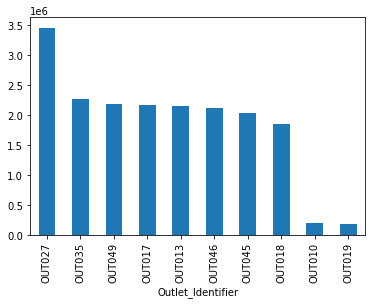

In [41]:
datadf.groupby(["Outlet_Identifier"]).Item_Outlet_Sales.sum().sort_values(ascending=False).plot(kind = "bar")

<AxesSubplot:xlabel='Item_Identifier'>

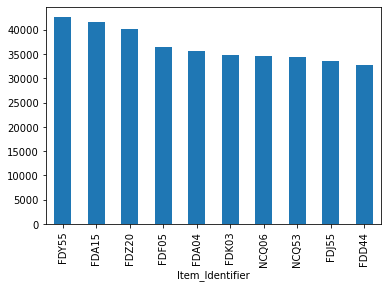

In [42]:
datadf.groupby(["Item_Identifier"]).Item_Outlet_Sales.sum().sort_values(ascending=False).head(10).plot(kind = "bar")

<AxesSubplot:xlabel='Item_Type'>

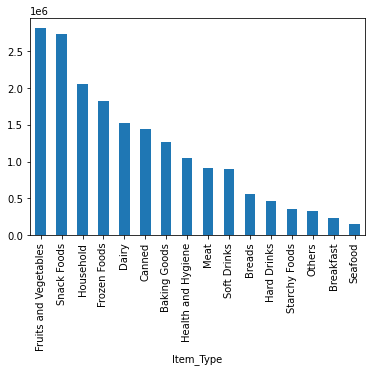

In [43]:
datadf.groupby("Item_Type").Item_Outlet_Sales.sum().sort_values(ascending=False).head(16).plot(kind = "bar")

<AxesSubplot:xlabel='Item_Type'>

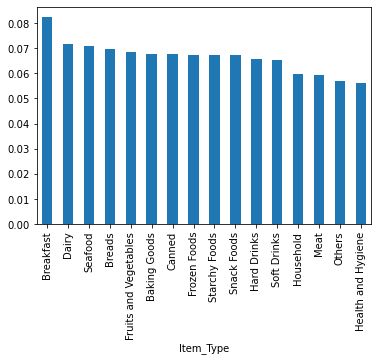

In [44]:
datadf.groupby("Item_Type").Item_Visibility.mean().sort_values(ascending = False).plot(kind = "bar")

<AxesSubplot:title={'center':'Item_Weight'}, xlabel='Outlet_Identifier'>

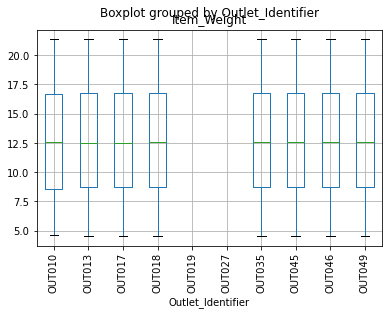

In [45]:
datadf.boxplot(column = "Item_Weight", by = "Outlet_Identifier", rot = 90)

<AxesSubplot:title={'center':'Item_Outlet_Sales'}, xlabel='Outlet_Type'>

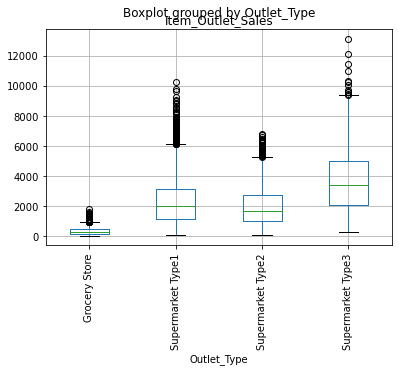

In [46]:
datadf.boxplot(column = "Item_Outlet_Sales", by = "Outlet_Type", rot = 90)

<AxesSubplot:title={'center':'Item_Visibility'}, xlabel='Outlet_Type'>

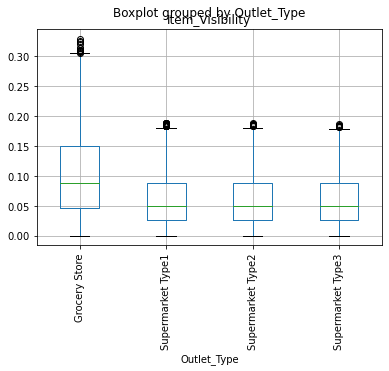

In [47]:
datadf.boxplot(column = "Item_Visibility", by = "Outlet_Type", rot = 90)

<AxesSubplot:xlabel='Outlet_Type', ylabel='Item_Outlet_Sales'>

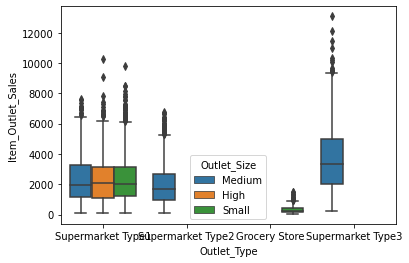

In [48]:
sns.boxplot(data = datadf, x = "Outlet_Type", y = "Item_Outlet_Sales", hue = "Outlet_Size")

<AxesSubplot:xlabel='Outlet_Type', ylabel='Item_Outlet_Sales'>

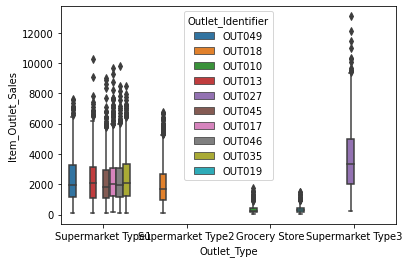

In [49]:
sns.boxplot(data = datadf, x = "Outlet_Type", y = "Item_Outlet_Sales", hue = "Outlet_Identifier")

# Data Preprocessing

In [50]:
datadf.duplicated().sum()

0

In [51]:
datadf.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales', 'data'],
      dtype='object')

In [52]:
datadf.isna().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
data                            0
dtype: int64

In [53]:
datadf["Item_Fat_Content"].value_counts()

Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

In [54]:
datadf["Item_Fat_Content"].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [55]:
datadf["Item_Fat_Content"].replace({'low fat':'Low Fat','LF':'Low Fat','reg':'Regular'}, inplace=True)

In [56]:
datadf["Item_Fat_Content"].unique()

array(['Low Fat', 'Regular'], dtype=object)

In [57]:
datadf["Item_Fat_Content"].value_counts()

Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64

In [58]:
datadf.groupby(["Item_Type","Item_Fat_Content"]).Item_Outlet_Sales.mean().sort_values(ascending=False)

Item_Type              Item_Fat_Content
Seafood                Regular             2899.263089
Starchy Foods          Low Fat             2558.425815
Breakfast              Low Fat             2425.411966
Snack Foods            Low Fat             2411.978843
Fruits and Vegetables  Regular             2400.571761
Dairy                  Regular             2370.875970
Household              Low Fat             2258.784300
Canned                 Regular             2243.441202
Meat                   Regular             2241.218571
Breads                 Regular             2230.238058
Canned                 Low Fat             2208.714377
Breads                 Low Fat             2183.434031
Fruits and Vegetables  Low Fat             2182.405740
Frozen Foods           Regular             2149.861640
Baking Goods           Regular             2147.340665
Starchy Foods          Regular             2145.611115
Dairy                  Low Fat             2145.174151
Hard Drinks            Lo

In [59]:
datadf["Item_Weight"] = datadf.groupby("Item_Identifier").Item_Weight.transform(lambda x: x.fillna(x.mean()))

In [60]:
datadf["Item_Weight"].isna().sum()

0

In [61]:
datadf["Item_Visibility"].value_counts()

0.000000    879
0.076856      3
0.076841      3
0.077290      3
0.077169      3
           ... 
0.209684      1
0.019592      1
0.013530      1
0.008772      1
0.066817      1
Name: Item_Visibility, Length: 13006, dtype: int64

In [62]:
from scipy.stats import mode

In [63]:
datadf.pivot_table(index="Outlet_Identifier", values="Outlet_Size", aggfunc=(lambda x: mode(x).mode[0]))

,Outlet_Size
Outlet_Identifier,
OUT010,0
OUT013,High
OUT017,0
OUT018,Medium
OUT019,Small
OUT027,Medium
OUT035,Small
OUT045,0
OUT046,Small


In [64]:
datadf.pivot_table(index="Outlet_Type", values="Outlet_Size", aggfunc=(lambda x: mode(x).mode[0]))

,Outlet_Size
Outlet_Type,
Grocery Store,Small
Supermarket Type1,Small
Supermarket Type2,Medium
Supermarket Type3,Medium


In [65]:
datadf["Outlet_Size"] = datadf.groupby(["Outlet_Type"]).Outlet_Size.transform(lambda x: x.fillna(mode(x).mode[0]))

In [66]:
datadf["Outlet_Size"].isna().sum()

0

In [67]:
datadf["Item_Visibility"] = datadf["Item_Visibility"].replace({0:np.NAN})

In [68]:
datadf.pivot_table(values="Item_Visibility", index = "Item_Type", columns = "Outlet_Type")

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Item_Type,,,,
Baking Goods,0.116306,0.066692,0.068206,0.066524
Breads,0.111612,0.067579,0.067976,0.066038
Breakfast,0.126056,0.079993,0.083079,0.078609
Canned,0.112484,0.066167,0.064655,0.067549
Dairy,0.120742,0.069299,0.069000,0.069213
Frozen Foods,0.115895,0.065449,0.064184,0.064816
Fruits and Vegetables,0.114820,0.067123,0.067503,0.066758
Hard Drinks,0.109913,0.064873,0.063611,0.065297
Health and Hygiene,0.098924,0.055021,0.053081,0.054924


In [69]:
truth_table_item_outlet_type_visibility = datadf.pivot_table(values="Item_Visibility", index = "Item_Type", columns = "Outlet_Type")

In [70]:
truth_table_item_outlet_type_visibility

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Item_Type,,,,
Baking Goods,0.116306,0.066692,0.068206,0.066524
Breads,0.111612,0.067579,0.067976,0.066038
Breakfast,0.126056,0.079993,0.083079,0.078609
Canned,0.112484,0.066167,0.064655,0.067549
Dairy,0.120742,0.069299,0.069000,0.069213
Frozen Foods,0.115895,0.065449,0.064184,0.064816
Fruits and Vegetables,0.114820,0.067123,0.067503,0.066758
Hard Drinks,0.109913,0.064873,0.063611,0.065297
Health and Hygiene,0.098924,0.055021,0.053081,0.054924


In [71]:
test = datadf[datadf["Item_Visibility"].isna()].head(1)

In [72]:
test

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,data
3,FDX07,19.2,Regular,NaN,Fruits and Vegetables,182.095,OUT010,1998,Small,Tier 3,Grocery Store,732.38,train


In [73]:
def find_visibility(x):
    return truth_table_item_outlet_type_visibility.loc[x["Item_Type"], x["Outlet_Type"]]

In [74]:
find_visibility(test)

Outlet_Type,Grocery Store
Item_Type,
Fruits and Vegetables,0.11482


In [75]:
datadf[datadf["Item_Visibility"].isnull()].apply(find_visibility, axis= 1)

3        0.114820
4        0.057774
5        0.068206
10       0.067123
32       0.065584
           ...   
14166    0.114820
14171    0.067549
14177    0.065578
14184    0.065485
14202    0.066167
Length: 879, dtype: float64

In [76]:
datadf.reset_index().drop(columns="index")

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,data
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train
3,FDX07,19.20,Regular,NaN,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,train
4,NCD19,8.93,Low Fat,NaN,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14199,FDB58,10.50,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1,NaN,test
14200,FDD47,7.60,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2,NaN,test
14201,NCO17,10.00,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,Small,Tier 2,Supermarket Type1,NaN,test
14202,FDJ26,15.30,Regular,NaN,Canned,214.6218,OUT017,2007,Small,Tier 2,Supermarket Type1,NaN,test


In [77]:
datadf.drop_duplicates()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,data
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train
3,FDX07,19.20,Regular,NaN,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800,train
4,NCD19,8.93,Low Fat,NaN,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14199,FDB58,10.50,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1,NaN,test
14200,FDD47,7.60,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2,NaN,test
14201,NCO17,10.00,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,Small,Tier 2,Supermarket Type1,NaN,test
14202,FDJ26,15.30,Regular,NaN,Canned,214.6218,OUT017,2007,Small,Tier 2,Supermarket Type1,NaN,test


In [78]:
datadf["Item_Visibility"].fillna(datadf[datadf["Item_Visibility"].isnull()].apply(find_visibility, axis= 1), inplace = True)

In [79]:
datadf["Item_Visibility"].isna().sum()

0

# Feature Engineering

In [80]:
datadf.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales', 'data'],
      dtype='object')

In [81]:
datadf["Outlet_age"] = 2021 - datadf["Outlet_Establishment_Year"]

In [82]:
datadf.drop(columns="Outlet_Establishment_Year", inplace=True)

In [83]:
datadf.corr()

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,Outlet_age
Item_Weight,1.000000,-0.021476,0.035751,0.013261,-0.000247
Item_Visibility,-0.021476,1.000000,-0.008985,-0.140762,0.093420
Item_MRP,0.035751,-0.008985,1.000000,0.567574,-0.000141
Item_Outlet_Sales,0.013261,-0.140762,0.567574,1.000000,0.049135
Outlet_age,-0.000247,0.093420,-0.000141,0.049135,1.000000


<AxesSubplot:>

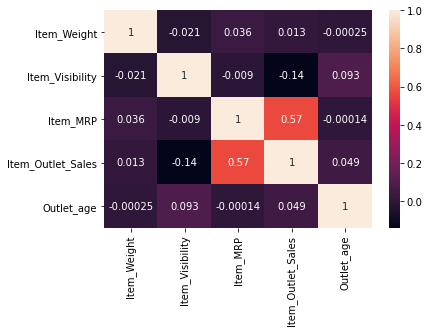

In [84]:
sns.heatmap(datadf.corr(), annot=True)

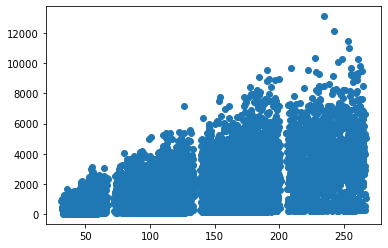

In [85]:
plt.scatter(datadf["Item_MRP"], datadf["Item_Outlet_Sales"])

In [86]:
datadf.select_dtypes(exclude=np.number)

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,data
0,FDA15,Low Fat,Dairy,OUT049,Medium,Tier 1,Supermarket Type1,train
1,DRC01,Regular,Soft Drinks,OUT018,Medium,Tier 3,Supermarket Type2,train
2,FDN15,Low Fat,Meat,OUT049,Medium,Tier 1,Supermarket Type1,train
3,FDX07,Regular,Fruits and Vegetables,OUT010,Small,Tier 3,Grocery Store,train
4,NCD19,Low Fat,Household,OUT013,High,Tier 3,Supermarket Type1,train
...,...,...,...,...,...,...,...,...
14199,FDB58,Regular,Snack Foods,OUT046,Small,Tier 1,Supermarket Type1,test
14200,FDD47,Regular,Starchy Foods,OUT018,Medium,Tier 3,Supermarket Type2,test
14201,NCO17,Low Fat,Health and Hygiene,OUT045,Small,Tier 2,Supermarket Type1,test
14202,FDJ26,Regular,Canned,OUT017,Small,Tier 2,Supermarket Type1,test


In [87]:
category_cols = datadf.select_dtypes(exclude=np.number).drop(columns=["Item_Identifier","data"]).columns

In [88]:
preprocess_category_datadf = pd.get_dummies(datadf[category_cols])

In [89]:
scalar = StandardScaler()

In [90]:
numeric_cols = datadf.select_dtypes(include=np.number).drop(columns="Item_Outlet_Sales").columns

In [91]:
preprocess_numeric_datadf = pd.DataFrame(scalar.fit_transform(datadf[numeric_cols]), columns=numeric_cols)

In [92]:
preprocess_final = pd.concat([preprocess_category_datadf, preprocess_numeric_datadf,datadf[["Item_Identifier","Outlet_Identifier","data", "Item_Outlet_Sales"]]], axis = 1)

In [93]:
train_preprocessed = preprocess_final[preprocess_final["data"]=="train"]

In [94]:
train_preprocessed = train_preprocessed.drop(columns=["data"])

In [95]:
test_preprocessed = preprocess_final[preprocess_final["data"]=="test"]

In [96]:
test_preprocessed = test_preprocessed.drop(columns=["data","Item_Outlet_Sales"])

In [97]:
train_preprocessed.columns

Index(['Item_Fat_Content_Low Fat', 'Item_Fat_Content_Regular',
       'Item_Type_Baking Goods', 'Item_Type_Breads', 'Item_Type_Breakfast',
       'Item_Type_Canned', 'Item_Type_Dairy', 'Item_Type_Frozen Foods',
       'Item_Type_Fruits and Vegetables', 'Item_Type_Hard Drinks',
       'Item_Type_Health and Hygiene', 'Item_Type_Household', 'Item_Type_Meat',
       'Item_Type_Others', 'Item_Type_Seafood', 'Item_Type_Snack Foods',
       'Item_Type_Soft Drinks', 'Item_Type_Starchy Foods',
       'Outlet_Identifier_OUT010', 'Outlet_Identifier_OUT013',
       'Outlet_Identifier_OUT017', 'Outlet_Identifier_OUT018',
       'Outlet_Identifier_OUT019', 'Outlet_Identifier_OUT027',
       'Outlet_Identifier_OUT035', 'Outlet_Identifier_OUT045',
       'Outlet_Identifier_OUT046', 'Outlet_Identifier_OUT049',
       'Outlet_Size_High', 'Outlet_Size_Medium', 'Outlet_Size_Small',
       'Outlet_Location_Type_Tier 1', 'Outlet_Location_Type_Tier 2',
       'Outlet_Location_Type_Tier 3', 'Outlet_Type_Groce

In [98]:
test_preprocessed.head(10)

,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Type_Baking Goods,Item_Type_Breads,Item_Type_Breakfast,Item_Type_Canned,Item_Type_Dairy,Item_Type_Frozen Foods,Item_Type_Fruits and Vegetables,Item_Type_Hard Drinks,...,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Weight,Item_Visibility,Item_MRP,Outlet_age,Item_Identifier,Outlet_Identifier
8523,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1.710530,-1.286299,-0.533831,-0.139681,FDW58,OUT049
8524,0,1,0,0,0,0,1,0,0,0,...,0,1,0,0,-0.965996,-0.653196,-0.864708,-1.095319,FDW14,OUT017
8525,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0.388391,0.601144,1.622763,-0.020226,NCN55,OUT010
8526,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,-1.177753,-1.125811,0.225966,-1.095319,FDQ58,OUT017
8527,0,1,0,0,0,0,1,0,0,0,...,0,0,0,1,0.173409,0.991400,1.501577,1.532686,FDY38,OUT027
8528,0,1,0,0,0,0,0,0,1,0,...,0,1,0,0,-0.643523,-0.132370,-0.384245,0.099229,FDH56,OUT046
8529,0,1,1,0,0,0,0,0,0,0,...,0,0,1,0,1.409555,0.252962,-1.464153,-1.334228,FDL48,OUT018
8530,1,0,1,0,0,0,0,0,0,0,...,0,0,0,1,-0.773587,-1.117727,-0.965547,1.532686,FDC48,OUT027
8531,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,-1.394885,1.089169,-0.729026,-0.498045,FDN33,OUT045
8532,1,0,1,0,0,0,0,0,0,0,...,0,1,0,0,-1.463679,-1.324585,0.739109,-1.095319,FDA36,OUT017


# Model

In [99]:
model =LinearRegression()

In [100]:
X = train_preprocessed.drop(columns=["Item_Identifier","Outlet_Identifier","Item_Outlet_Sales"])

In [101]:
Y = train_preprocessed["Item_Outlet_Sales"]

In [102]:
model.fit(X, Y)

LinearRegression()

In [103]:
mean_squared_error(Y, model.predict(X), squared=False)

1127.3610604275566

In [104]:
X_test = test_preprocessed.drop(columns=["Item_Identifier","Outlet_Identifier"])

In [105]:
Y_pred = model.predict(X_test)

In [106]:
submission = pd.read_csv("SampleSubmission_TmnO39y.txt")

In [107]:
submission

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,NaN
1,FDW14,OUT017,NaN
2,NCN55,OUT010,NaN
3,FDQ58,OUT017,NaN
4,FDY38,OUT027,NaN
...,...,...,...
5676,FDB58,OUT046,NaN
5677,FDD47,OUT018,NaN
5678,NCO17,OUT045,NaN
5679,FDJ26,OUT017,NaN


In [108]:
submission["Item_Outlet_Sales"] = Y_pred

In [109]:
submission.head(10)

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,1848.0
1,FDW14,OUT017,1526.0
2,NCN55,OUT010,1812.0
3,FDQ58,OUT017,2578.0
4,FDY38,OUT027,5162.0
5,FDH56,OUT046,1960.0
6,FDL48,OUT018,628.0
7,FDC48,OUT027,2810.0
8,FDN33,OUT045,1494.0
9,FDA36,OUT017,3096.0


In [110]:
submission['Item_Outlet_Sales'] = np.abs(submission['Item_Outlet_Sales'])

In [111]:
submission.head(10)

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,1848.0
1,FDW14,OUT017,1526.0
2,NCN55,OUT010,1812.0
3,FDQ58,OUT017,2578.0
4,FDY38,OUT027,5162.0
5,FDH56,OUT046,1960.0
6,FDL48,OUT018,628.0
7,FDC48,OUT027,2810.0
8,FDN33,OUT045,1494.0
9,FDA36,OUT017,3096.0


In [112]:
submission.to_csv("linear_regression_result.csv", index = False)

In [113]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split

In [114]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(X,Y,test_size = 0.3, random_state=90)

In [115]:
x_train1.shape

(5966, 42)

In [116]:
y_train1.shape

(5966,)

In [117]:
x_test1.shape

(2557, 42)

In [118]:
y_test1.shape

(2557,)

In [119]:
poly = PolynomialFeatures(degree=2)

In [120]:
x_train_poly = poly.fit_transform(x_train1)

In [121]:
model2 = LinearRegression()


In [122]:
X.shape

(8523, 42)

In [123]:
model2.fit(x_train_poly, y_train1)

LinearRegression()

In [124]:
y_poly_pred = model2.predict(x_train_poly)

In [125]:
print("mse: ", mean_squared_error(y_train1, y_poly_pred)  )

mse:  1100316.0841316453


In [126]:
def poly_fit(train_X, train_y, test_X, test_y, deg):
    poly = PolynomialFeatures(degree = deg)
    X_poly = poly.fit_transform(train_X)
    lin2 = LinearRegression()
    lin2.fit(X_poly,train_y)
    print("Train MSE : ",mean_squared_error(train_y, lin2.predict(poly.fit_transform(train_X))))
    print("Test MSE : ",mean_squared_error(test_y, lin2.predict(poly.fit_transform(test_X))))
    train_mse = mean_squared_error(train_y, lin2.predict(poly.fit_transform(train_X)))
    test_mse = mean_squared_error(test_y, lin2.predict(poly.fit_transform(test_X)))
    return train_mse,test_mse

In [127]:
y_train1.shape

(5966,)

In [133]:
train_mse, test_mse = poly_fit(x_train1, y_train1, x_test1, y_test1, 4)

Train MSE :  747599.9999581099
Test MSE :  1.8317195999335231e+19


In [135]:
train_mse_list = []
test_mse_list = []
for i in range(1,4):
    print("degree : ",i)
    train_mse, test_mse = poly_fit(x_train1, y_train1, x_test1, y_test1, i)
    train_mse_list.append(train_mse)
    test_mse_list.append(test_mse)

degree :  1
Train MSE :  1258108.3805233985
Test MSE :  1318900.2468958173
degree :  2
Train MSE :  1100316.0841316453
Test MSE :  1215680.3872520942
degree :  3
Train MSE :  977491.5730108273
Test MSE :  1.733852053755146e+23


# Polynomial Submission

In [136]:
polynew = PolynomialFeatures(degree=1)

In [140]:
X_poly = polynew.fit_transform(X)

In [141]:
X_test_poly = polynew.fit_transform(X_test)

In [142]:
modelPoly = LinearRegression()

In [143]:
modelPoly.fit(X_poly, Y)

LinearRegression()

In [144]:
Y_poly_pred = modelPoly.predict(X_poly)

In [145]:
mean_absolute_error(Y, Y_poly_pred)

836.560394696703

In [146]:
y_pred = modelPoly.predict(X_test_poly)

In [147]:
submission = pd.read_csv("SampleSubmission_TmnO39y.txt")

In [148]:
submission

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,NaN
1,FDW14,OUT017,NaN
2,NCN55,OUT010,NaN
3,FDQ58,OUT017,NaN
4,FDY38,OUT027,NaN
...,...,...,...
5676,FDB58,OUT046,NaN
5677,FDD47,OUT018,NaN
5678,NCO17,OUT045,NaN
5679,FDJ26,OUT017,NaN


In [149]:
submission["Item_Outlet_Sales"] = y_pred


In [150]:
submission

,Item_Identifier,Outlet_Identifier,Item_Outlet_Sales
0,FDW58,OUT049,1824.0
1,FDW14,OUT017,1544.0
2,NCN55,OUT010,1840.0
3,FDQ58,OUT017,2576.0
4,FDY38,OUT027,5208.0
...,...,...,...
5676,FDB58,OUT046,2288.0
5677,FDD47,OUT018,2392.0
5678,NCO17,OUT045,1816.0
5679,FDJ26,OUT017,3568.0


In [152]:
submission.to_csv("Bigmart-prediction-polynomialReg.csv", index = False)